In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("D:\\excler\\Assignment\\KNN\\glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
X = np.array(df.iloc[:,3:5])
y = np.array(df['Type'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))

Shape of X:(214, 2)
Shape of y:(214,)


In [4]:
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

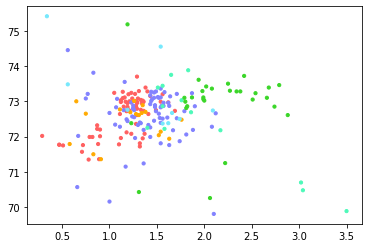

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be plac

<AxesSubplot:xlabel='Na', ylabel='RI'>

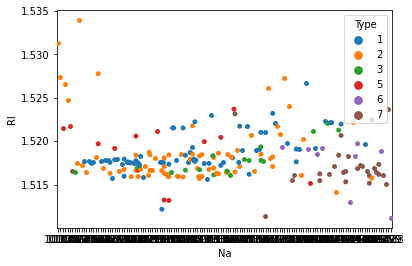

In [6]:
sns.swarmplot(x='Na',y='RI',data=df,hue='Type')

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(160, 2)
Shape of y_Train:(160,)
Shape of X_Test:(54, 2)
Shape of y_Test:(54,)


In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
pred = knn.predict(X_train)
pred

array([1, 1, 2, 2, 1, 2, 2, 1, 3, 1, 2, 2, 7, 1, 1, 2, 2, 1, 1, 2, 7, 7,
       2, 1, 7, 1, 2, 7, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 5,
       6, 2, 1, 1, 2, 2, 7, 1, 7, 7, 2, 2, 2, 1, 1, 2, 2, 1, 5, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 3, 1, 1, 2, 7, 7, 7, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 5, 2, 2, 1, 1, 7, 1, 7, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 7, 7, 2, 2, 1, 2, 2, 2, 1, 5, 7, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 7, 1, 7, 1, 2, 1, 1, 3, 1, 5, 1, 2, 1, 2, 2, 5, 1,
       1, 1, 2, 2, 2, 2], dtype=int64)

In [10]:
accuracy = knn.score(X_train,Y_train)
print("The accuracy is :"+str(accuracy))

The accuracy is :0.7875


In [11]:
cnf_matrix = confusion_matrix(Y_train,pred)
print(cnf_matrix)

[[46  3  0  0  0  0]
 [ 7 55  0  0  0  2]
 [ 5  2  4  0  0  0]
 [ 1  4  0  5  0  0]
 [ 2  3  0  1  0  0]
 [ 1  2  0  0  1 16]]


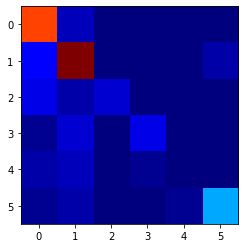

In [12]:
plt.imshow(cnf_matrix,cmap=plt.cm.jet)

<AxesSubplot:>

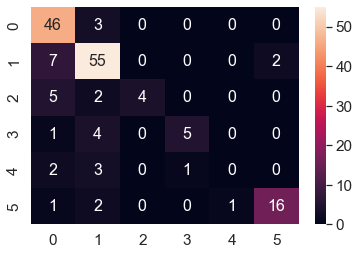

In [13]:
df_cm = pd.DataFrame(cnf_matrix, range(6),range(6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})

C:\Users\HP\AppData\Local\Temp/ipykernel_16180/2226070377.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


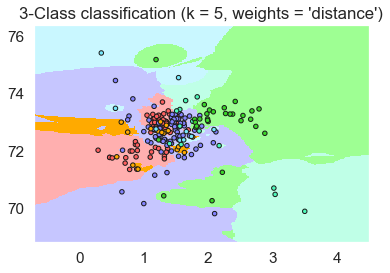

In [14]:
h = .02  
n_neighbors = 5
for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))

plt.show()